In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import sys
import os
sys.path.insert(0, "../../../photoDAQ")
sys.path.insert(0, "../../python")
import file
from diagnostics import probe
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

file.PATH = '/media/robert/Data_Storage/Data/Double_Probe_Diagnostic/'

In [2]:
dataSets = [1806050001, 1806050002, 1806050003, 1806050005, 1806050006, 1806050007]
sign = [0, 1, 0, 0, 1, 1]
shots = probe.get_shots(dataSets)
data, volt, time = probe.load_data(dataSets, sign, shots)
dataShifted = probe.shift_dataSets(shots, data, [0.02, 0.02, 0.02, 0.04, 0.04, 0.08], [2, 2, 0, 0, 1, 1])
timeShifted = probe.shift_time(dataSets)

Temperature is 0.87 eV


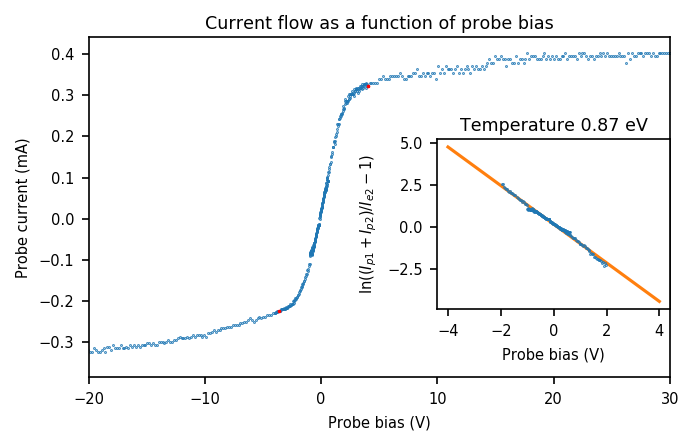

In [11]:
# Now lets look at a couple times and see what the current/voltage looks like
ind = 70
current = -dataShifted[:, ind]/9.92 #in mA

Ip1I = 495
if ind < 70:
    Ip2I = 295 - ind
else:
    Ip2I = 225
plt.figure(figsize=(5, 3), dpi=150)
ax1 = plt.subplot()
plt.plot(volt, current, '.', linestyle='none', markerSize=0.7)
plt.plot(volt[Ip1I], current[Ip1I], 'r.', linestyle='none', markerSize=1.5)
plt.plot(volt[Ip2I], current[Ip2I], 'r.', linestyle='none', markerSize=1.5)
plt.title('Current flow as a function of probe bias')
plt.xlabel('Probe bias (V)')
plt.ylabel('Probe current (mA)')
plt.xlim(-20, 30)

# Inset temperature plot
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.6,0.2,0.4,0.5])
ax2.set_axes_locator(ip)
Ip1 = current[Ip1I]
Ip2 = -current[Ip2I]
sel = np.logical_and(current > -Ip2, current < Ip1)*np.logical_and(volt > -2, volt < 2)
Ie2 = current[sel] + Ip2
v = volt[sel]
log = np.log((Ip1+Ip2)/Ie2 - 1)

def line(x, m, b):
    return m*x + b

popt, pcov = curve_fit(line, v, log)
print('Temperature is %0.2f eV' % (-1/popt[0]))

vplot = np.linspace(-4, 4, 100)
plt.plot(v, log, '.', linestyle='none', markerSize=0.7)
plt.plot(vplot, line(vplot, *popt), zorder=0)
plt.title('Temperature %0.2f eV' % (-1/popt[0]))
plt.xlabel('Probe bias (V)')
plt.ylabel(r'$\ln((I_{p1}+I_{p2})/I_{e2}-1)$')

plt.show()

Temperature is 0.87 eV


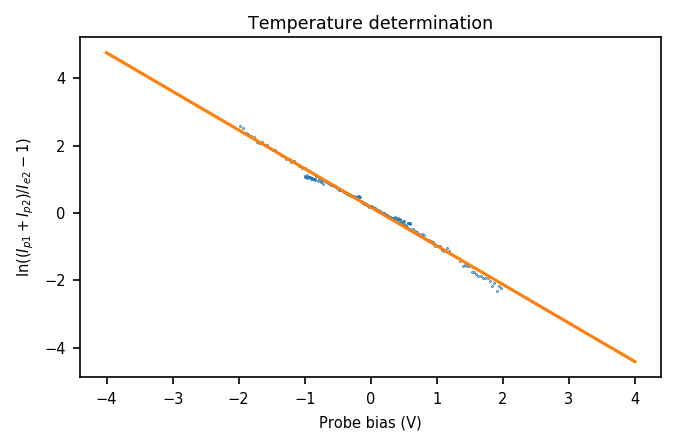

In [4]:
Ip1 = current[Ip1I]
Ip2 = -current[Ip2I]
sel = np.logical_and(current > -Ip2, current < Ip1)*np.logical_and(volt > -2, volt < 2)
Ie2 = current[sel] + Ip2
v = volt[sel]
log = np.log((Ip1+Ip2)/Ie2 - 1)

def line(x, m, b):
    return m*x + b

popt, pcov = curve_fit(line, v, log)
print('Temperature is %0.2f eV' % (-1/popt[0]))

vplot = np.linspace(-4, 4, 100)
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(v, log, '.', linestyle='none', markerSize=0.7)
plt.plot(vplot, line(vplot, *popt))
plt.title('Temperature determination')
plt.xlabel('Probe bias (V)')
plt.ylabel(r'$\ln((I_{p1}+I_{p2})/I_{e2}-1)$')
plt.show()